<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br>
<h1>Introduction to Algorithmic Trading with Python</h1>

> _by: Michael Rolleigh & Jack Daoud_
>
> _June 01<sup>th</sup>, 2021_


<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>

# Table of Contents
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<font size="4">1. </font>[<font size="4">Introduction to bt & TA-Lib Packages</font>](#introtobt)

<font size="4">2. </font>[<font size="4">Setup</font>](#setup)

<font size="4">3. </font>[<font size="4">Single Backtesting Strategies</font>](#simplebt)

>
> <font size="3">i. </font>[<font size="3">Bollinger Bands Strategy</font>](#bbands)
>
> <font size="3">ii. </font>[<font size="3">Simple Moving Average Strategy</font>](#sma)

<font size="4">4. </font>[<font size="4">Multiple Backtesting Strategies</font>](#multiplebt)

<br><br>

# Introduction to bt & TA-Lib Packages
<a id='introtobt'></a>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


## Installing Packages

To install the **bt package**, simply run the code below in your jupyter notebook:

> `! pip install bt`

To install the **TA-Lib package** for Python, you'll first need to install the TA-Lib program on your computer:

**Windows Users:**

>**Step 01:** Download and install TA-Lib from here: https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib 
>
> Choose `TA_Lib‑0.4.20‑cp39‑cp39‑win_amd64.whl` or `TA_Lib‑0.4.20‑cp39‑cp39‑win32.whl` depending on whether your processor is 64 bit or 32 bit.
> If you'd like more instructions, check out this guide: https://blog.quantinsti.com/install-ta-lib-python/#install-ta-lib-on-windows-pc)
>
>**Step 02:** Run this code in your Jupyter notebook: `!pip install TA-Lib`

**Mac Users:**

>**Step 01:** You'll need Homebrew (MacOS package manager) installed, if you have this, skip this step. If you don't, open a new terminal window and paste this code to download & install Homebrew: `/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"`
>
>**Step 02:** Run this code to download & install TA-Lib the program: `brew install ta-lib`
>
>**Step 03:** Run this code in your Jupyter notebook: `! pip install TA-Lib`


If you are having issues installing any of these programs or packages, please reach out to me ASAP on `jdaoud2019@student.hult.edu`.

## Common Functions

If you remember the basic calls of bt and TA-lib methods/functions from the Financial Trading with Python course on DataCamp, then you can skip this section. If you need a quick refresher, read on.

There are many different methods (a.k.a functions) that you can use. You can view all of them, with examples, by checking the documentation for each:

- [bt package](https://pmorissette.github.io/bt/#), referred to as bt.
- [TA-Lib package](http://mrjbq7.github.io/ta-lib/doc_index.html), referred to as ta.

For bt, we will be using, more or less, these methods/functions:

- `bt.get()`: gets Adjusted Close data from Yahoo Finance
- `bt.Strategy()`: defines a strategy
- `bt.Backtest()`: builds a backtesting algorithm
- `bt.run()`: runs the backtest & stores a variety results

After storing the results of the algorithm you ran, in a variable called `results`, you can call more functions for that variable. For example:

- `results.plot()`
- `results.display()`
- `results.plot_histogram()`
- `results.plot_security_weights()`

For TA-Lib, we will be using, more or less, these methods/functions to import indicators:

- `ta.SMA()`: Simple Moving Average
- `ta.EMA()`: Exponential Moving Average
- `ta.ADX()`: Average Directional Movement Index
- `ta.RSI()`: Relative Strength Index
- `ta.BBANDS()`: Bollinger Bands

<br><br>

# Setup
<a id='setup'></a>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## 1) Packages
We'll start with importing the packages (tools) we'll need to do algorithmic trading.

In [1]:
# Packages
import bt                          # Backtesting package
import talib as ta                 # Trading Analytics Library
import pandas as pd                # Data science fundamentals package
import matplotlib.pyplot as plt    # Visual graphics package

# Configurations
%matplotlib inline 
plt.rcParams["figure.figsize"] = (15, 7) # Set figure size for notebook

## 2) Data
We'll need some data. In this notebook, we'll look at the `Adjusted Close` of FAANG stocks during the COVID-19 pandemic.

In [2]:
# Get FANG adjusted closed data from Yahoo Finance using the bt package
faang_data = bt.get('FB, AMZN, AAPL, NFLX, GOOG', start='2019-12-01')

# Print last five rows
faang_data.tail()

,fb,amzn,aapl,nflx,goog
Date,,,,,
2021-05-25,327.790009,3259.050049,126.900002,501.339996,2409.070068
2021-05-26,327.660004,3265.159912,126.849998,502.359985,2433.530029
2021-05-27,332.750000,3230.110107,125.279999,503.859985,2402.510010
2021-05-28,328.730011,3223.070068,124.610001,502.809998,2411.560059
2021-06-01,329.130005,3218.649902,124.279999,499.079987,2429.810059


<br><br>

# Single Backtesting Strategies
<a id='simplebt'></a>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Next, we define our backtesting strategy using a Bollinger Bands technical indicator. We will test this strategy on on the previously imported FANG data.

<br>

## 1) Bollinger Bands Strategy
<a id='bbands'></a>

This strategy will focus on the allocation of risk, which is defined as volatility. The Technical Indicator used is **Bollinger Bands (BBands)**. The wider the bands, the more volatile the asset prices.

### 1.1) Plot Bollinger Bands

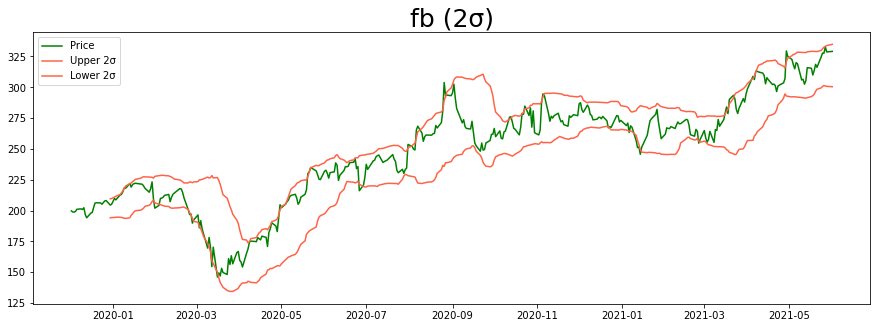

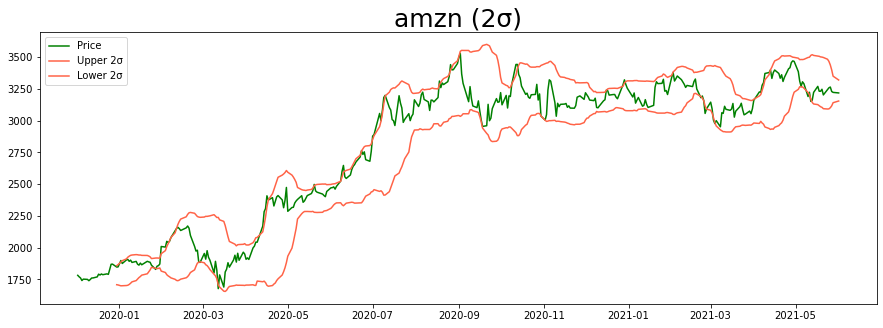

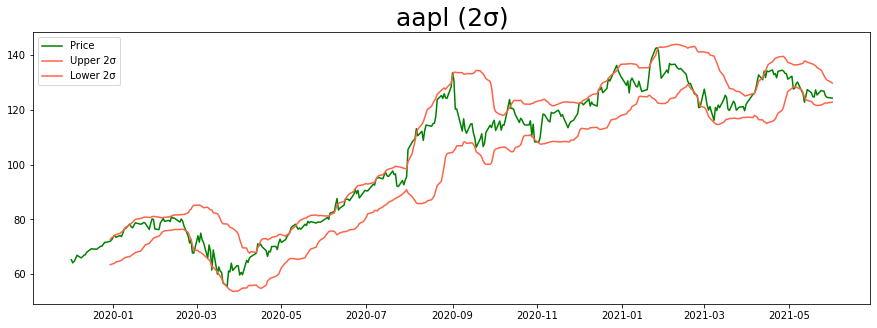

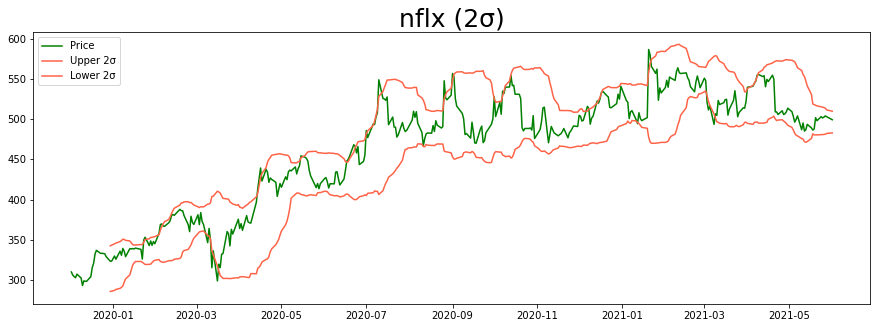

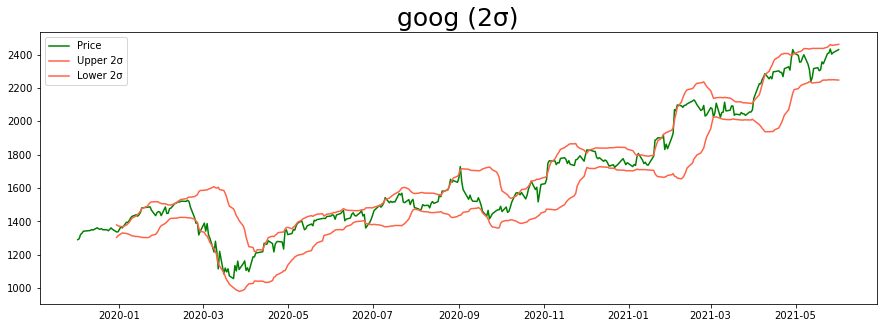

In [3]:
# Placeholder for bands
upper_bands = []
middle_bands = []
lower_bands = []

# Loop over each ticker in FANG data
for ticker in faang_data.columns:

    # Calculate BBANDS
    upper, middle, lower  = ta.BBANDS(
            faang_data[ticker],  # Data
            timeperiod = 20,    # n Period simple moving average
            nbdevup    = 2,     # k Standard deviation upwards  
            nbdevdn    = 2)     # k Standard deviation downwards

    upper_bands.append(upper)
    middle_bands.append(middle)
    lower_bands.append(middle)
    
    # Plot the BBANDS
    plt.figure(figsize=(15, 5))
    plt.plot(faang_data[ticker], color='green', label='Price')
    plt.plot(upper, color='tomato', label="Upper 2σ")
    #plt.plot(middle, color='blue', label='SMA Period')
    plt.plot(lower, color='tomato', label='Lower 2σ')

    # Customize and show the plot
    plt.legend(loc='upper left')
    plt.title(ticker+' (2σ)', fontsize=25)
    plt.show()

In [4]:
# Check bands
# bands[0][2] # Facebook lower band
# bands[1][0] # Amazon upper band
# bands[2][1] # Apple middle band

### 1.2) Define Signal

In [5]:
# Create placeholder for signal
lower_bands_df = pd.DataFrame()

# Copy over lower bands for our tickers and transpose the dataframe
lower_bands_df = pd.DataFrame.from_records(data = lower_bands).T

# Rename columns to match our adjustced close dataframe
lower_bands_df.columns = faang_data.columns

# Define signal as True when adjust close is less than lower band
signal = faang_data < lower_bands_df

# Check signal data
signal.tail()

,fb,amzn,aapl,nflx,goog
Date,,,,,
2021-05-25,False,True,True,False,False
2021-05-26,False,True,True,False,False
2021-05-27,False,True,True,False,False
2021-05-28,False,True,True,False,False
2021-06-01,False,True,True,False,False


### 1.3) Define the Backtesting Strategy

/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


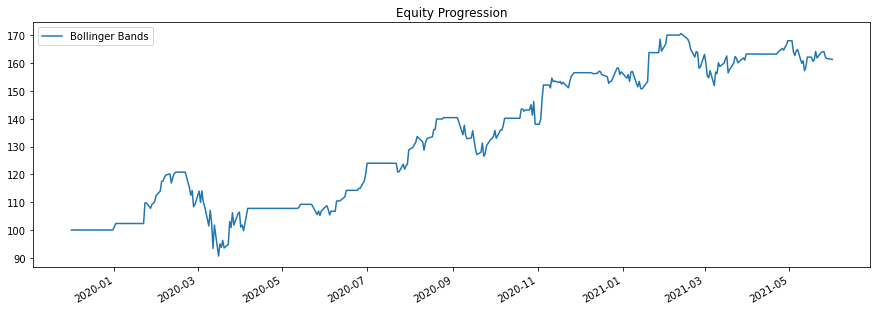

In [6]:
# Define the strategy
strategy = bt.Strategy('Bollinger Bands',
                       [bt.algos.SelectWhere(signal, include_no_data=False),         
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# Create the Backtest algorithm using the FANG historical adjusted close
backtest = bt.Backtest(strategy, faang_data)

# Run the backtest and store the results
results = bt.run(backtest)

# Plot equity progression
results.plot();

In [7]:
# Print strategy statistics
results.display()

Stat                 Bollinger Bands
-------------------  -----------------
Start                2019-12-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         61.32%
Daily Sharpe         1.19
Daily Sortino        1.87
CAGR                 37.54%
Max Drawdown         -24.97%
Calmar Ratio         1.50

MTD                  -0.20%
3m                   -1.12%
6m                   3.05%
YTD                  2.84%
1Y                   48.87%
3Y (ann.)            37.54%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  37.54%

Daily Sharpe         1.19
Daily Sortino        1.87
Daily Mean (ann.)    36.76%
Daily Vol (ann.)     30.93%
Daily Skew           -0.10
Daily Kurt           7.34
Best Day             8.94%
Worst Day            -10.93%

Monthly Sharpe       1.67
Monthly Sortino      6.04
Monthly Mean (ann.)  34.14%
Monthly Vol (ann.)   20.41%
Monthly Skew         0.59
Monthly Kurt         -0.83
Best Month           13.42%
Worst Month         


<br>

## 2) SMA Strategy
<a id='sma'></a>

### 2.1) Plot SMAs
- Calculate an SMA for each FANG ticker
- Plot the difference between Adjusted Close & SMA

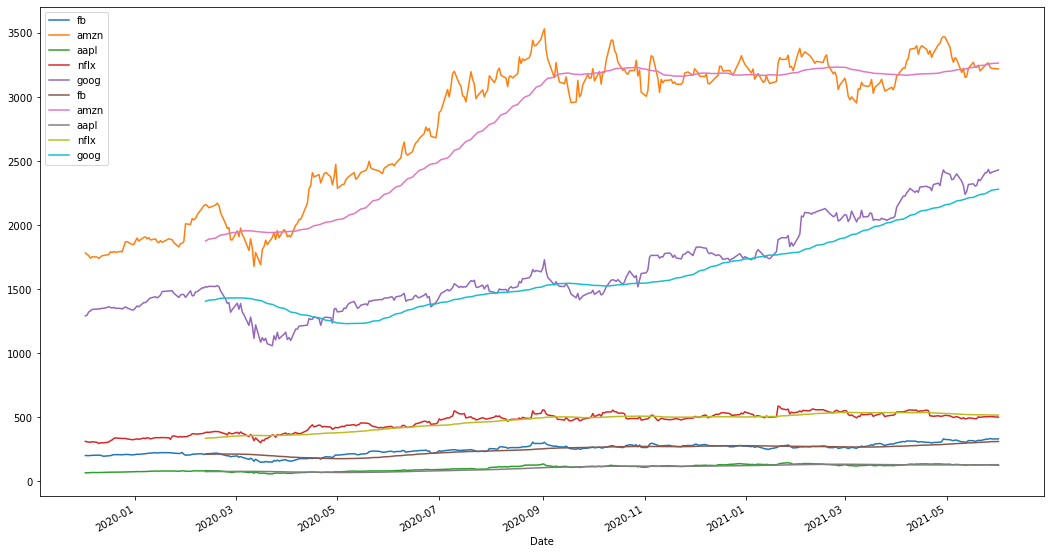

In [8]:
# Create a placeholder dataframe for SMAs:
faang_sma = pd.DataFrame()

# Calculate the SMA for each ticker
for ticker in faang_data.columns:
    
    # Create a new column for each ticker's SMA
    faang_sma[ticker] = ta.SMA(faang_data[ticker], timeperiod=50)

# Plot adjusted close and SMA for each ticker
plot = bt.merge(faang_data, faang_sma).plot(figsize=(18, 10))

### 2.2) Define the Signal & Backtesting strategy

In [9]:
# Define a signal
signal = faang_data > faang_sma

# Define the strategy
strategy = bt.Strategy('Above_50_SMA', 
                       [bt.algos.SelectWhere(signal), # Select securities based on signal
                        bt.algos.WeighEqually(),      # Distribute money equally among assets
                        bt.algos.Rebalance()])

# Create the Backtest algorithm using the FANG historical adjusted close
backtest = bt.Backtest(strategy, faang_data)

# Run the backtest and store the results
results = bt.run(backtest)

/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


### 2.3) Analyze Backtesting Results

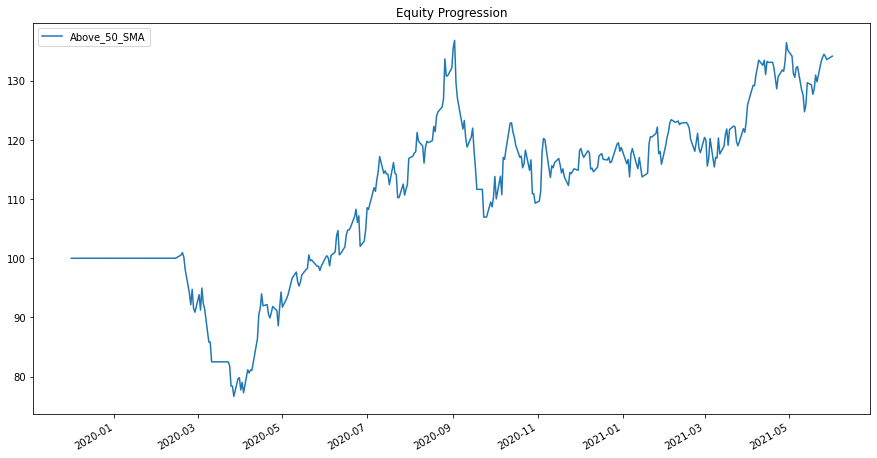

In [10]:
# Plot the equity progression of our backtesting algorithm
results.plot(figsize=(15,8));

In [11]:
# Print the statistics of our backtesting algorithm
results.display()

Stat                 Above_50_SMA
-------------------  --------------
Start                2019-12-01
End                  2021-06-01
Risk-free rate       0.00%

Total Return         34.14%
Daily Sharpe         0.83
Daily Sortino        1.37
CAGR                 21.62%
Max Drawdown         -24.06%
Calmar Ratio         0.90

MTD                  0.44%
3m                   11.40%
6m                   13.50%
YTD                  12.98%
1Y                   34.03%
3Y (ann.)            21.62%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  21.62%

Daily Sharpe         0.83
Daily Sortino        1.37
Daily Mean (ann.)    23.73%
Daily Vol (ann.)     28.66%
Daily Skew           0.01
Daily Kurt           1.40
Best Day             6.59%
Worst Day            -6.09%

Monthly Sharpe       0.80
Monthly Sortino      1.41
Monthly Mean (ann.)  24.06%
Monthly Vol (ann.)   30.13%
Monthly Skew         -0.38
Monthly Kurt         0.32
Best Month           18.11%
Worst Month          -16.53

<br><br>

# Multiple Backtesting Strategies
<a id='multiplebt'></a>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

We'll take it one level higher at this stage and start using functions to make our lives easier.

Stat                 sma10       sma20       sma40       spy
-------------------  ----------  ----------  ----------  ----------
Start                2010-01-03  2010-01-03  2010-01-03  2010-01-03
End                  2021-06-01  2021-06-01  2021-06-01  2021-06-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         320.76%     317.93%     236.06%     362.23%
Daily Sharpe         0.72        0.73        0.65        0.87
Daily Sortino        1.14        1.16        1.02        1.33
CAGR                 13.42%      13.36%      11.21%      14.36%
Max Drawdown         -31.77%     -40.72%     -34.93%     -33.72%
Calmar Ratio         0.42        0.33        0.32        0.43

MTD                  0.97%       0.97%       1.59%       -0.09%
3m                   0.20%       4.90%       4.94%       8.08%
6m                   32.74%      28.21%      26.11%      15.52%
YTD                  24.55%      18.77%      16.46%      12.61%
1Y                   75.81%      62

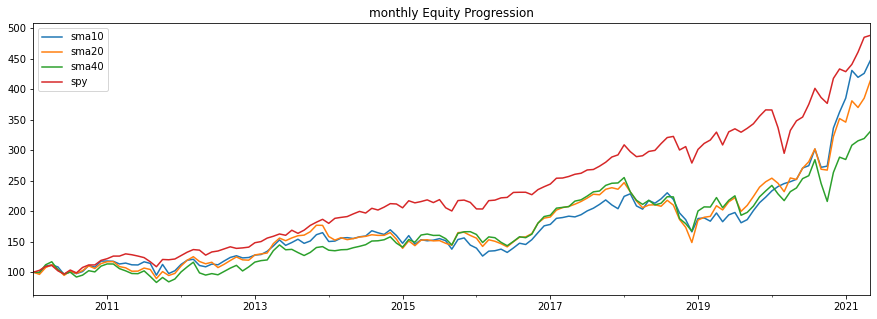

In [12]:
# Now create a function that will allow us to generate related backtests more quickly
# This step is not required, but it is good programming practice
def above_sma(tickers, sma_per=50, start='2010-01-01', name='above_sma'):
    """
    Long securities that are above their n period
    Simple Moving Averages with equal weights.
    """
    # download data
    data = bt.get(tickers, start=start)
    # calc sma
    sma = data.rolling(sma_per).mean()

    # create strategy
    s = bt.Strategy(name, [bt.algos.SelectWhere(data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

    # now we create the backtest
    return bt.Backtest(s, data)

# simple backtest to test long-only allocation
def long_only_ew(tickers, start='2010-01-01', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

# create the backtests
tickers = 'aapl,msft,c,gs,ge'
sma10 = above_sma(tickers, sma_per=10, name='sma10')
sma20 = above_sma(tickers, sma_per=20, name='sma20')
sma40 = above_sma(tickers, sma_per=40, name='sma40')
benchmark = long_only_ew('spy', name='spy')

# run all the backtests!
res2 = bt.run(sma10, sma20, sma40, benchmark)

# Plot the equity positions of the strats
res2.plot(freq='m')

# Display the stats for the 4 strats 
res2.display()